<a href="https://colab.research.google.com/github/wilosaurus/PCVK_2241720171/blob/main/Meet7_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICUM**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [4]:
def convolution2d(image, kernel, stride, padding):
  if padding > 0 :
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode = 'constant')

  image_h, image_w = image.shape
  kernel_h, kernel_w = kernel.shape

  # ukuran setelah konvolusi
  output_h = (image_h - kernel_h) // stride + 1
  output_w = (image_w - kernel_w) // stride + 1
  output = np.zeros((output_h, output_w))

  # konvolusi
  for y in range(0, output_h):
    for x in range(0, output_w):
      output[y, x] = np.sum(image[y*stride:y*stride+kernel_h, x*stride:x*stride+kernel_w] * kernel)
  return output

In [6]:
# load image
img = cv.imread('/content/drive/MyDrive/image/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

**Sharpen**

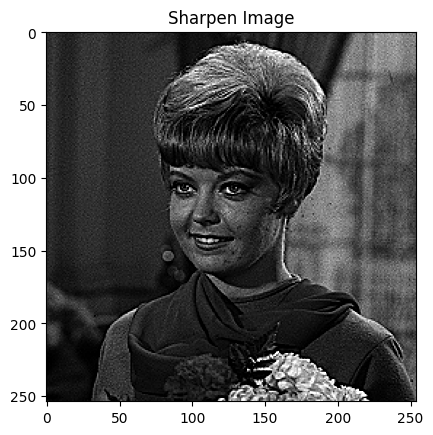

In [7]:
# image sharpen
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sharpen_img = convolution2d(img_gray, kernel, 1, 0)
plt.imshow(sharpen_img, cmap='gray', vmin=0, vmax=255)
plt.title('Sharpen Image')
plt.show()

**Emboos**

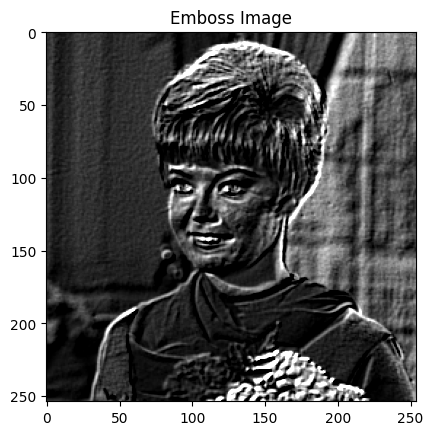

In [8]:
# Image Emboss
kernel_emboss = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])

emboss_img = convolution2d(img_gray, kernel_emboss, stride=1, padding=1)
plt.imshow(emboss_img, cmap='gray', vmin=0, vmax=255)
plt.title('Emboss Image')
plt.show()

**Left Sobel Edge Detection**

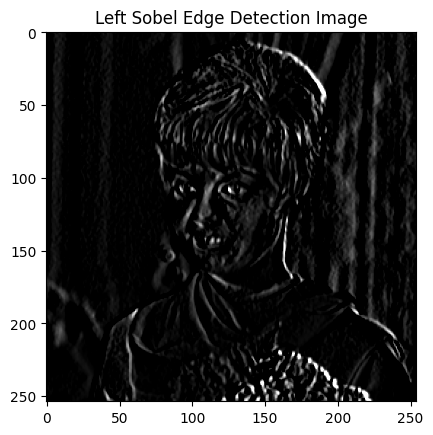

In [9]:
# Image Emboss
kernel_sobel_left = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

sobelleft_img = convolution2d(img_gray, kernel_sobel_left, stride=1, padding=1)
plt.imshow(sobelleft_img, cmap='gray', vmin=0, vmax=255)
plt.title('Left Sobel Edge Detection Image')
plt.show()

**Canny Edge Detection**

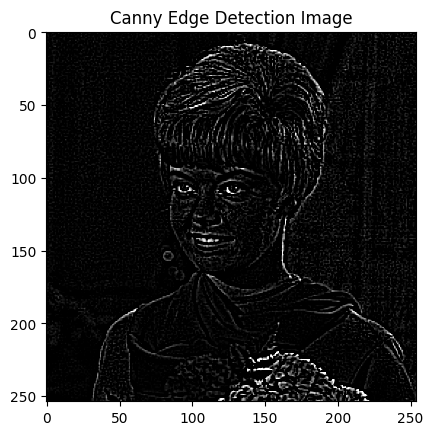

In [10]:
# Image canny
kernel_canny = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

canny_img = convolution2d(img_gray, kernel_canny, stride=1, padding=2)
plt.imshow(canny_img, cmap='gray', vmin=0, vmax=255)
plt.title('Canny Edge Detection Image')
plt.show()

**5x5 Gaussian Blur**

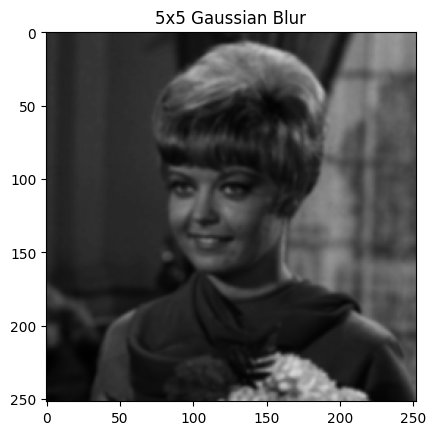

In [11]:
# Image 5X5 Gaussian Blur
kernel_5x5 = (1/256) * np.array([[1, 4, 6, 4, 1],
                                  [4, 16, 24, 16, 4],
                                  [6, 24, 36, 24, 6],
                                  [4, 16, 24, 16, 4],
                                  [1, 4, 6, 4, 1]])

gaussian_img = convolution2d(img_gray, kernel_5x5, stride=1, padding=2)
plt.imshow(gaussian_img, cmap='gray', vmin=0, vmax=255)
plt.title('5x5 Gaussian Blur')
plt.show()

**21x21 Gaussian Blur**

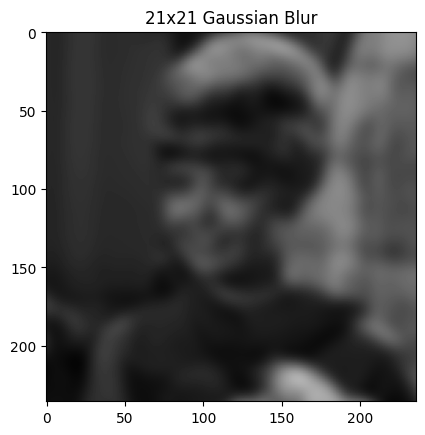

In [12]:
# Image 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T
gaussian_blur_img = convolution2d(img_gray, gaussian_kernel_2d, stride=1, padding=kernel_size//2)
plt.imshow(gaussian_blur_img, cmap='gray', vmin=0, vmax=255)
plt.title('21x21 Gaussian Blur')
plt.show()